In [1]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

In [3]:
# Calculate test data and get its size
X = series.values
size = int(len(X) * 0.66)

In [4]:
# Split into train and test values
train, test = X[0:size], X[size:len(X)]

In [5]:
# Create a history object with all the train data and appending new data to it
hist_obj = [x for x in train]

In [6]:
# Create an empty list for all the predictions done
predictions = list()
for t in range(len(test)):
    arima_model = ARIMA(hist_obj, order=(5,1,0))
    arima_model_fit = arima_model.fit(disp=0)
    output = arima_model_fit.forecast()
    y_new = output[0]
    predictions.append(y_new)
    obs = test[t]
    hist_obj.append(obs)
    print('predicted=%f, expected=%f' % (y_new, obs))

predicted=349.117590, expected=342.300000
predicted=306.512897, expected=339.700000
predicted=387.376377, expected=440.400000
predicted=348.154243, expected=315.900000
predicted=386.308882, expected=439.300000
predicted=356.082097, expected=401.300000
predicted=446.379430, expected=437.400000
predicted=394.737263, expected=575.500000
predicted=434.915489, expected=407.600000
predicted=507.923512, expected=682.000000
predicted=435.483013, expected=475.300000
predicted=652.743897, expected=581.300000
predicted=546.343515, expected=646.900000


In [7]:
# Mean squared error and the plotted graph
err = mean_squared_error(test, predictions)
print('Mean squared error: ' + str(err))

Mean squared error: 6958.323678642191


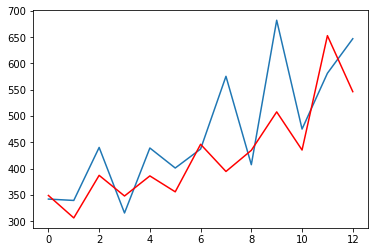

In [8]:
# Graph
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()